총 143 종류의 포켓몬 데이터를 발견했습니다.
포켓몬 리스트 (앞 10개): ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur']


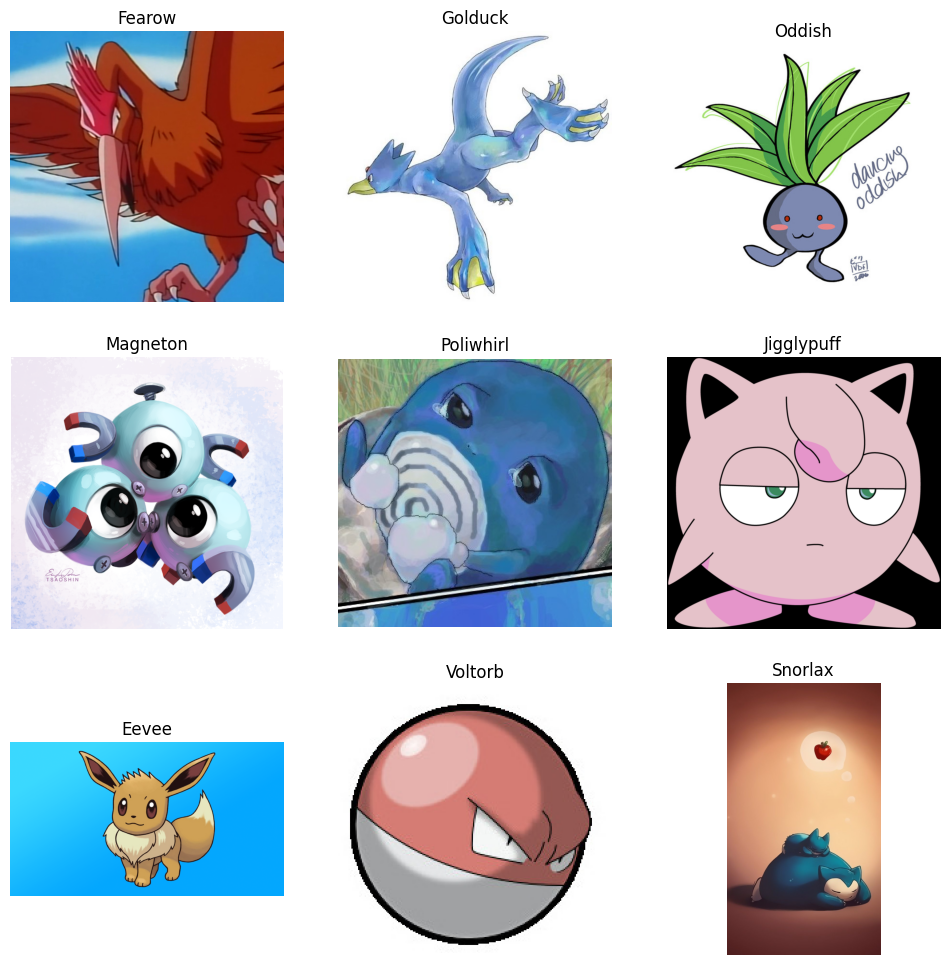

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터셋 경로를 지정합니다.
dataset_path = 'C:/Users/shrry/PokemonProject/dataset/' # 사용자님의 경로

# 2. 경로에서 포켓몬 이름(클래스) 목록을 가져옵니다.
pokemon_names = os.listdir(dataset_path)
if '.DS_Store' in pokemon_names: # macOS용 시스템 파일 제외
    pokemon_names.remove('.DS_Store')

print(f"총 {len(pokemon_names)} 종류의 포켓몬 데이터를 발견했습니다.")
print(f"포켓몬 리스트 (앞 10개): {pokemon_names[:10]}")

# 3. 랜덤으로 이미지 9개를 골라 확인해 봅니다. (수정된 부분 포함)
plt.figure(figsize=(12, 12))
valid_images_shown = 0 # 실제로 화면에 보여준 유효한 이미지 수
attempts = 0 # 무한 루프 방지를 위한 시도 횟수
max_attempts = 50 # 최대 시도 횟수 (데이터셋에 문제가 많을 경우 대비)

while valid_images_shown < 9 and attempts < max_attempts:
    attempts += 1
    random_pokemon_name = np.random.choice(pokemon_names)
    pokemon_folder_path = os.path.join(dataset_path, random_pokemon_name)

    if not os.path.isdir(pokemon_folder_path): # 폴더가 아니면 다음 시도로
        continue

    image_files_in_folder = os.listdir(pokemon_folder_path)
    if not image_files_in_folder: # 폴더가 비어있으면 다음 시도로
        continue
        
    random_image_file = np.random.choice(image_files_in_folder)
    image_path = os.path.join(pokemon_folder_path, random_image_file)
    
    image = cv2.imread(image_path) # 이미지를 읽기
    
    # --- ✨ 여기가 수정된 핵심 부분입니다! ✨ ---
    if image is not None: # 이미지를 성공적으로 읽었을 경우에만 다음을 진행
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이제 image는 None이 아니므로 안전
        
        plt.subplot(3, 3, valid_images_shown + 1)
        plt.imshow(image_rgb)
        plt.title(random_pokemon_name)
        plt.axis('off')
        valid_images_shown += 1 # 유효한 이미지를 보여줬으니 카운터 증가
    # -----------------------------------------
    # 만약 image is None 이라면 (파일을 못 읽었다면), 아무것도 안 하고 다음 루프로 넘어갑니다.

if valid_images_shown < 9:
    print(f"\nWarning: 최대 {max_attempts}번 시도했지만, {valid_images_shown}개의 이미지만 표시할 수 있었습니다.")

plt.show()

In [6]:
# [최종 해결 코드]

X_data = [] # 이미지 데이터
y_data = [] # 레이블 데이터

IMG_SIZE = 128

print("데이터 처리 시작... 문제가 있는 파일은 건너뜁니다.")

# 모든 포켓몬 폴더를 하나씩 순회합니다.
for pokemon_name in pokemon_names:
    pokemon_folder_path = os.path.join(dataset_path, pokemon_name)
    
    # 각 포켓몬 폴더 안의 모든 이미지 파일을 하나씩 순회합니다.
    for image_file in os.listdir(pokemon_folder_path):
        image_path = os.path.join(pokemon_folder_path, image_file)
        
        # 이미지를 읽습니다.
        image = cv2.imread(image_path)
        
        # 만약 이미지를 제대로 읽지 못했다면(None) 이 파일은 건너뜁니다.
        if image is None:
            continue # 다음 파일로 넘어감
            
        # 이미지를 성공적으로 읽은 경우에만 아래의 리사이즈/저장을 수행합니다.
        image_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image_normalized = image_resized / 255.0
        
        X_data.append(image_normalized)
        y_data.append(pokemon_name)

print("\n모든 이미지 처리 완료!")

데이터 처리 시작... 문제가 있는 파일은 건너뜁니다.

모든 이미지 처리 완료!


In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 파이썬 리스트를 NumPy 배열로 변환합니다.
X = np.array(X_data)
y_labels = np.array(y_data)

# 문자 레이블('Pikachu')을 숫자(25)로 변환합니다.
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)

# 숫자 레이블(25)을 원-핫 인코딩([0, ..., 1, ..., 0]) 방식으로 변환합니다.
y_categorical = to_categorical(y_encoded)

# 최종 변환된 데이터의 모양(shape)을 확인합니다.
print(f"\n이미지 데이터 모양 (X): {X.shape}")
print(f"레이블 데이터 모양 (y): {y_categorical.shape}")


이미지 데이터 모양 (X): (16490, 128, 128, 3)
레이블 데이터 모양 (y): (16490, 143)


In [8]:
import numpy as np
import pickle # 파이썬 객체를 저장하기 위한 라이브러리

# 1. 전처리된 이미지 데이터와 레이블 데이터 저장
# .npz 확장자는 여러 NumPy 배열을 한 파일에 압축 저장합니다.
np.savez_compressed('preprocessed_pokemon_data.npz', X_data=X, y_data=y_categorical)
print("X, y_categorical 데이터가 'preprocessed_pokemon_data.npz' 파일로 저장되었습니다.")

# 2. LabelEncoder 객체(encoder) 저장
# 이 객체는 포켓몬 이름을 숫자로, 숫자를 다시 이름으로 바꾸는 규칙을 담고 있습니다.
with open('pokemon_label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
print("encoder가 'pokemon_label_encoder.pkl' 파일로 저장되었습니다.")

# 다음번 실행시 이 코드를 실행해 이 똥똥똥똥똥똥똥똥똥똥 사후르야

X, y_categorical 데이터가 'preprocessed_pokemon_data.npz' 파일로 저장되었습니다.
encoder가 'pokemon_label_encoder.pkl' 파일로 저장되었습니다.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input # Input을 추가로 불러옴

model = Sequential()
model.add(Input(shape=(128, 128, 3))) # <-- 이렇게 입력층을 따로 추가
model.add(Conv2D(32, (3, 3), activation='relu')) # <-- 여기서는 input_shape를 빼줌
# 모델의 뼈대를 만듭니다.
model = Sequential()

# 특징 추출부 (Convolutional Base)
# Conv2D: 이미지의 특징(선, 모양, 질감)을 뽑아내는 필터 역할
# MaxPooling2D: 중요한 특징만 남기고 이미지 크기를 줄여 계산을 효율적으로 만듦
# Dropout: 모델이 학습 데이터만 너무 외우는 '과적합'을 방지
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 분류기 (Classifier)
# Flatten: 2D 이미지 데이터를 1줄로 쭉 폄
# Dense: 특징들을 종합해서 어떤 포켓몬인지 최종 판단
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
# 최종 출력층: 143개의 포켓몬 종류 중 하나로 결론
model.add(Dense(y_categorical.shape[1], activation='softmax')) 

# 모델의 학습 방식(optimizer, loss)과 평가 기준(metrics)을

In [17]:
from sklearn.model_selection import train_test_split

# X, y_categorical 변수는 이 셀 이전에 이미 만들어져 있어야 합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_categorical, 
    test_size=0.2,
    random_state=42 
)

print(f"훈련용 데이터 수: {len(X_train)}")
print(f"테스트용 데이터 수: {len(X_test)}")

훈련용 데이터 수: 13192
테스트용 데이터 수: 3298


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 모델의 뼈대를 만듭니다.
model = Sequential()

# 특징 추출부
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 분류기
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_categorical.shape[1], activation='softmax')) 

# 모델 컴파일
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 모델 구조 요약 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 143)                 │          73,359 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,012,175 (49.64 MB)

 Trainable params: 13,012,175 (49.64 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 수정된 학습 코드
print("epochs=30으로 모델 재학습 시작...")
history_new = model.fit( # history 변수명을 다르게 해서 이전 기록과 구분해도 좋습니다.
    X_train, y_train,
    epochs=30,  # <--- 이렇게 수정!
    batch_size=32,
    validation_data=(X_test, y_test),
    initial_epoch=15 # 이전 학습을 이어서 하려면 이렇게 설정 (선택 사항)
                     # 처음부터 완전히 새로 30 에포크를 돌리고 싶다면 이 줄은 삭제
)
print("\n모델 재학습 완료!")

epochs=30으로 모델 재학습 시작...
Epoch 16/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 132s 300ms/step - accuracy: 0.0231 - loss: 4.8003 - val_accuracy: 0.1765 - val_loss: 3.6220
Epoch 17/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 133s 323ms/step - accuracy: 0.1952 - loss: 3.3978 - val_accuracy: 0.4342 - val_loss: 2.4525
Epoch 18/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 135s 326ms/step - accuracy: 0.3978 - loss: 2.4244 - val_accuracy: 0.5109 - val_loss: 2.0622
Epoch 19/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 134s 324ms/step - accuracy: 0.5121 - loss: 1.8961 - val_accuracy: 0.5846 - val_loss: 1.7206
Epoch 20/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 134s 324ms/step - accuracy: 0.6146 - loss: 1.4652 - val_accuracy: 0.6140 - val_loss: 1.5868
Epoch 21/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 135s 327ms/step - accuracy: 0.6748 - loss: 1.1914 - val_accuracy: 0.6295 - val_loss: 1.5306
Epoch 22/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 143s 329ms/step - accuracy: 0.7411 - loss: 0.9080 - val_accuracy: 0.6531 - val_loss: 1.5175
Epoch 23/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 135

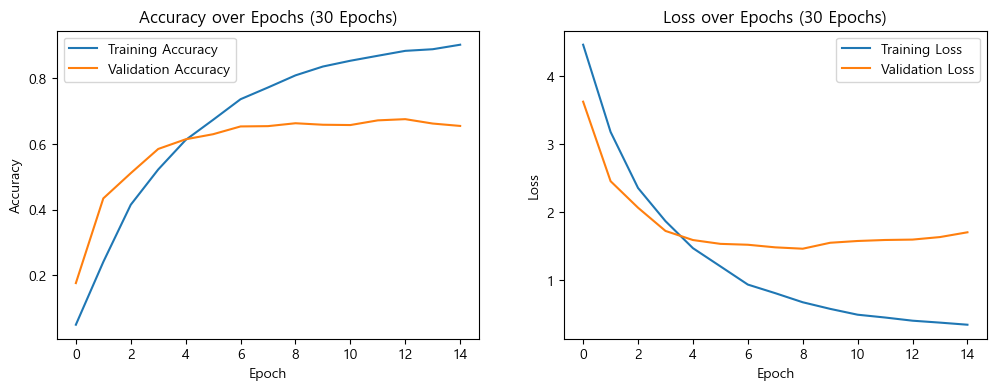

In [22]:
import matplotlib.pyplot as plt # plt가 아직 import되지 않았다면 이 줄도 필요합니다.

# 1. 정확도(Accuracy) 그래프 (history_new 사용)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_new.history['accuracy'], label='Training Accuracy')       # <--- history_new 로 수정
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy') # <--- history_new 로 수정
plt.title('Accuracy over Epochs (30 Epochs)') # 제목에 30 에포크임을 명시해주는 것이 좋습니다.
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 2. 손실(Loss) 그래프 (history_new 사용)
plt.subplot(1, 2, 2)
plt.plot(history_new.history['loss'], label='Training Loss')                # <--- history_new 로 수정
plt.plot(history_new.history['val_loss'], label='Validation Loss')          # <--- history_new 로 수정
plt.title('Loss over Epochs (30 Epochs)')   # 제목에 30 에포크임을 명시해주는 것이 좋습니다.
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
# 테스트 데이터로 모델의 최종 성능을 평가합니다.
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"\n테스트 데이터 최종 정확도: {accuracy * 100:.2f}%")

104/104 - 9s - 83ms/step - accuracy: 0.6546 - loss: 1.7007

테스트 데이터 최종 정확도: 65.46%


In [15]:
# 학습된 모델을 파일로 저장합니다.
model.save('pokemon_classifier_model.keras') # 최신 .keras 포맷으로 저장

print("\n모델이 'pokemon_classifier_model.keras' 파일로 성공적으로 저장되었습니다.")


모델이 'pokemon_classifier_model.keras' 파일로 성공적으로 저장되었습니다.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


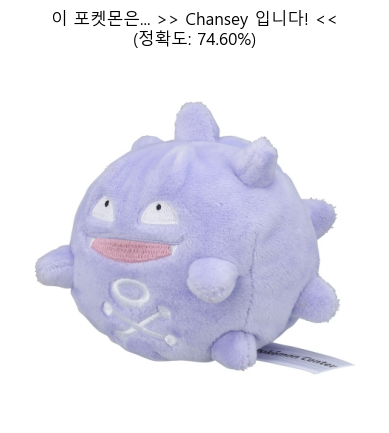

In [19]:
# 섹션 9: 저장된 모델로 랜덤 이미지 예측 (최종 판독기)
# (이전 셀들이 실행되어 encoder 변수 등이 메모리에 있어야 함)
import tensorflow as tf 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder # encoder가 없다면 필요

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

loaded_model = tf.keras.models.load_model('pokemon_classifier_model.keras')

# LabelEncoder(encoder)는 이전 셀에서 이미 만들어졌다고 가정합니다.
# 만약 없다면, 여기서 y_labels로부터 다시 만들어야 합니다.
# 예:
# if 'encoder' not in globals() and 'y_labels' in globals():
#     from sklearn.preprocessing import LabelEncoder
#     encoder = LabelEncoder()
#     encoder.fit(y_labels) # y_labels는 섹션 3에서 생성됨
# elif 'encoder' not in globals():
#     print("오류: LabelEncoder(encoder)가 없습니다. 이전 셀들을 실행해주세요.")
#     # 여기서 실행을 중단하거나, encoder를 로드/생성하는 로직 추가

def predict_random_image(image_path_to_predict): # image_path 변수명 변경
    try:
        # ... (이전 predict_random_image 함수 내용과 동일, 단 encoder를 사용)
        image = cv2.imread(image_path_to_predict)
        if image is None:
            print(f"오류: '{image_path_to_predict}' 파일을 읽을 수 없습니다. 파일 경로를 다시 확인해 주세요.")
            return

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # IMG_SIZE는 이전 셀에서 128로 정의되었다고 가정
        image_resized = cv2.resize(image_rgb, (IMG_SIZE, IMG_SIZE)) 
        image_normalized = image_resized / 255.0
        image_batch = np.expand_dims(image_normalized, axis=0)
        
        prediction_output = loaded_model.predict(image_batch) # 변수명 변경
        predicted_class_index = np.argmax(prediction_output)
        
        # encoder가 정의되어 있어야 함
        predicted_pokemon_name = encoder.inverse_transform([predicted_class_index])[0]
        prediction_probability = np.max(prediction_output) * 100
        
        plt.imshow(image_rgb)
        plt.title(f"이 포켓몬은... >> {predicted_pokemon_name} 입니다! <<\n(정확도: {prediction_probability:.2f}%)")
        plt.axis('off')
        plt.show()

    except NameError as ne:
        if 'encoder' in str(ne):
             print("오류: 'encoder' 객체가 정의되지 않았습니다. 노트북의 앞부분 셀(데이터 전처리)을 실행하여 encoder를 만들어주세요.")
        elif 'IMG_SIZE' in str(ne):
             print("오류: 'IMG_SIZE' 변수가 정의되지 않았습니다. 노트북의 앞부분 셀(데이터 전처리)을 실행하여 IMG_SIZE를 정의해주세요.")
        else:
            print(f"예측 중 NameError 오류가 발생했습니다: {ne}")
    except Exception as e:
        print(f"예측 중 오류가 발생했습니다: {e}")

# ... (import 문, 한글 폰트 설정, loaded_model, predict_random_image 함수 정의는 동일하게 유지) ...

# --- 3. 함수 사용하기 ---
# 여기에 예측하고 싶은 이미지의 전체 경로를 입력하세요!
# 사용자님이 만드신 'test' 폴더 안의 이미지 경로로 수정합니다.

# 예시: test 폴더에 'my_test_pokemon.jpg' 라는 파일을 넣었다고 가정
my_image_path = r"C:\Users\shrry\PokemonProject\test\test6.jpg" 

# 함수를 호출해서 예측을 실행합니다.
predict_random_image(my_image_path)